In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [14]:
from proj1_helpers import *
from toolbox import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, x, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)
y = (y + 1) * 0.5
num_samples = len(y)
tx, mean, var = standardize(x)

## Do your thing crazy machine learning thing here :) ...

(5000,)


C:\Users\Romain\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Romain\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


2429.98199443 [-0.96304635  0.19505986 -0.68166231 -0.79520315  0.05792588 -0.01386273
  0.81989306 -0.03615597  0.75133655  0.01503404 -0.01349826 -0.40262103
  0.29803414 -0.01942259  0.64352192  0.04418951 -0.00341999  0.70486356
  0.05502454  0.03795789  0.24973754 -0.02770327 -0.28014835 -0.48293252
  0.15032928  0.12722384  0.13107012 -0.0428552  -0.02057193 -0.02250668
 -0.29874962]


0.703

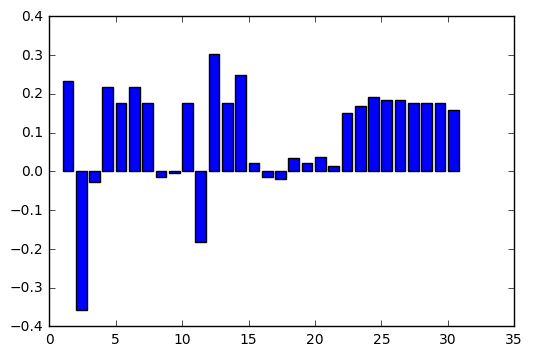

In [19]:
def plot_feature_to_output_correlations(tx, y):
    feature_count = tx.shape[1]

    corrs = np.zeros(feature_count)
    for i in range(feature_count):
        x = tx[:, i]
        corrs[i] = np.corrcoef(x, y)[0][1]

    fig, ax = plt.subplots()
    width = 0.5

    ax.bar(np.arange(feature_count), corrs)

def logistfun(x):
    exp = np.exp(x)
    return exp / (1 + exp)
    
def logistic_regression(y, tx, initial_w, gamma, max_iters):
    """Logistic regression"""
    
    def loss(y, tx, w):
        res = 0
        for n in range(len(y)):
            txn_t_x_w = tx[n].T @ w
            res += np.log(1 + np.exp(txn_t_x_w)) - y[n] * txn_t_x_w
        return np.abs(res)
    
    def grad(y, tx, w):
        return (tx.T @ (logistfun(tx @ w) - y)) / len(y)
    
    return gradient_descent(y, tx, initial_w, gamma, max_iters, loss, grad)

feature_count = tx.shape[1]
for i in range(feature_count):
    idxes = (tx[:,i] != -999)
    tx = tx[idxes]
    y = y[idxes]

print(y.shape)
    
plot_feature_to_output_correlations(tx, y)
loss, w = logistic_regression(y, tx, np.zeros(tx.shape[1]), 0.1, 1000)
print(loss, w)
res = logistfun(tx @ w) * 2 - 1

res[np.where(res < 0.5)] = 0
res[np.where(res >= 0.5)] = 1

np.count_nonzero(res == y) / len(y)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)